## Statistics

### Questions

```{admonition} Problem: JOIN Dataframes
:class: dropdown, tip
Can you tell me the ways in which 2 pandas data frames can be joined?
```

```{admonition} Solution:
:class: dropdown
A very high level difference is that merge() is used to combine two (or more) dataframes on the basis of values of common columns (indices can also be used, use left_index=True and/or right_index=True), and concat() is used to append one (or more) dataframes one below the other (or sideways, depending on whether the axis option is set to 0 or 1).

join() is used to merge 2 dataframes on the basis of the index; instead of using merge() with the option left_index=True we can use join().

![Combine DataFrames](images/image1.PNG)
```

```{admonition} Problem: [GOOGLE] Normal Distribution
:class: dropdown, tip

Write a function to generate N samples from a normal distribution and plot the histogram.
```

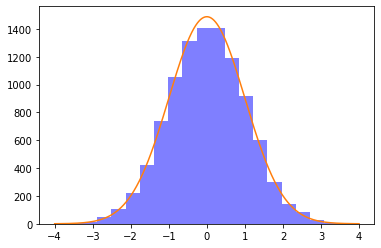

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def normal_sample_generator(N):
    # can be done using np.random.randn or stats.norm.rvs
    #x = np.random.randn(N)
    x = stats.norm.rvs(size=N)
    num_bins = 20
    plt.hist(x, bins=num_bins, facecolor='blue', alpha=0.5)

    y = np.linspace(-4, 4, N)
    bin_width = (x.max() - x.min()) / num_bins
    plt.plot(y, stats.norm.pdf(y) * N * bin_width)

    plt.show()

normal_sample_generator(10000)

```{admonition} Problem: [UBER] Bernoulli trial generator
:class: dropdown, tip

Given a random Bernoulli trial generator, write a function to return a value sampled from a normal distribution.
```

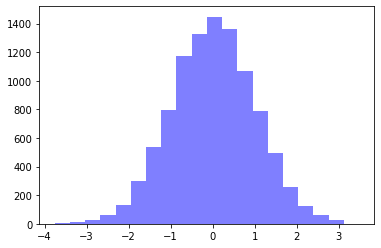

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# straightforward using the central limit theorem.

p = .5
n = 10000

# returns standard normal output via the central limit theorem
def standard_normal_output(p,n):
    bernoulli_mean = p
    bernoulli_variance = p*(1-p)
    bernoulli_std = abs(np.sqrt(bernoulli_variance))
    sample = np.random.binomial(size = n, n = 1, p = p)
    return (sample.mean() - bernoulli_mean)/(bernoulli_std/np.sqrt(n))

# now we plot this output 10000 times to indeed show it is a standard normal distribution
def plot_output():
    outputs=[]
    for i in range(0,n):
        outputs.append(standard_normal_output(p=p,n=n))
    num_bins = 20
    plt.hist(outputs, bins=num_bins, facecolor='blue', alpha=0.5)
    plt.show() 
plot_output()

```{admonition} Problem: [PINTEREST] Interquartile Distance
:class: dropdown, tip

Given an array of unsorted random numbers (decimals) find the interquartile distance.
```

In [3]:
# Interquartile distance is the difference between first and third quartile

# first let's generate a list of random numbers

import random
import numpy as np

li = [round(random.uniform(33.33, 66.66), 2) for i in range(50)]
print(li)

qtl_1 = np.quantile(li,.25)
qtl_3 = np.quantile(li,.75)

print("Interquartile distance: ", qtl_1 - qtl_3)

[35.08, 50.02, 60.4, 51.82, 37.31, 40.69, 39.67, 45.21, 45.7, 34.52, 42.25, 42.06, 57.53, 45.21, 52.25, 66.18, 34.77, 53.83, 35.99, 33.68, 47.57, 51.62, 38.79, 58.53, 51.25, 61.53, 33.49, 64.59, 35.93, 36.07, 63.0, 46.17, 34.36, 50.61, 50.73, 34.07, 65.38, 59.51, 42.84, 62.86, 54.46, 54.87, 49.58, 65.68, 59.23, 65.94, 38.46, 59.21, 55.28, 55.94]
Interquartile distance:  -19.269999999999996


````{admonition} Problem: [GENENTECH] Imputing the mdeian
:class: dropdown, tip

Write a function cheese_median to impute the median price of the selected California cheeses in place of the missing values. You may assume at least one cheese is not missing its price.

Input:

```python
import pandas as pd

cheeses = {"Name": ["Bohemian Goat", "Central Coast Bleu", "Cowgirl Mozzarella", "Cypress Grove Cheddar", "Oakdale Colby"], "Price" : [15.00, None, 30.00, None, 45.00]}

df_cheeses = pd.DataFrame(cheeses)
```

|          Name         | Price |
|:---------------------:|:-----:|
| Bohemian Goat         | 15.00 |
| Central Coast Bleu    | 30.00 |
| Cowgirl Mozzarella    | 30.00 |
| Cypress Grove Cheddar | 30.00 |
| Oakdale Colby         | 45.00 |

````

In [4]:
import pandas as pd

cheeses = {"Name": ["Bohemian Goat", "Central Coast Bleu", "Cowgirl Mozzarella", "Cypress Grove Cheddar", "Oakdale Colby"], "Price" : [15.00, None, 30.00, None, 45.00]}

df_cheeses = pd.DataFrame(cheeses)

df_cheeses['Price'] = df_cheeses['Price'].fillna(df_cheeses['Price'].median())
df_cheeses.head()

,Name,Price
0,Bohemian Goat,15.0
1,Central Coast Bleu,30.0
2,Cowgirl Mozzarella,30.0
3,Cypress Grove Cheddar,30.0
4,Oakdale Colby,45.0
